# Monte Carlo: 2D Ising Model-2

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### System parameters and helper functions

In [2]:
# initialize system parameters
J = 1.0
kB = 1.0
Tc = 2/np.log(1+np.sqrt(2))

# Hamiltonian
def energy(s, L):
    E = 0
    for i in range(L):
        for j in range(L):
            E += s[i,j] * (s[(i+1)%L, j] + s[i, (j+1)%L])
    energy = -J * E
    return energy

# magnetization
def magnet(s, L):
    M = 0.0
    for i in range(L):
        for j in range(L):
            M += s[i,j]
    return M

def random_spins(L):
    s = np.zeros([L,L], int)
    for i in range(L):
        for j in range(L):
            s[i,j] = 2 * int( 2 * np.random.random() ) -1
    return s

def dE(s, L, i, j):
    NB = s[(i+1)%L,j]+s[i,(j+1)%L]+s[(i-1)%L,j]+s[i,(j-1)%L]
    dE = 2 * s[i,j]*NB
    return dE

def printSPINS(s, L):
    for i in range(L):
        row = ''
        for j in range(L):
            if s[i,j] == +1: row += '＋'
            if s[i,j] == -1: row += '－'
        print(row)
    print()

### Make MC simuilation into a function

In [3]:
def Monte_Carlo(T, L, N_MC, spins):
    # initialize measurements
    beta = 1.0/(kB*T)
    
    accept = 0
    E = np.empty(N_MC)
    M = np.empty(N_MC)

    # main MC loop
    for n in range(N_MC):
        # sequential update
        for i in range(L):
            for j in range(L):
                if np.random.random() < np.exp(- beta * dE(spins, L, i, j)):
                    spins[i,j] = -spins[i,j]
                    accept += 1
        # measurements
        E[n] = energy(spins, L)
        M[n] = magnet(spins, L)
    
    acceptRatio = accept/(N_MC*(L*L)) #  per spin

    return acceptRatio, spins, E, M

In [4]:
def MC_average(T, E, M):
    N_MC = len(E)
    
    E_sqr = E * E
    E_mean = E.mean()
    E_sqr_mean = E_sqr.mean()
    C = (E_sqr_mean-E_mean*E_mean)/(kB*T*T)
        
    M_abs = np.absolute(M)    
    M_sqr = M * M
    M_mean = M.mean()
    M_abs_mean = M_abs.mean()
    M_sqr_mean = M_sqr.mean()
    Chi = (M_sqr_mean-M_mean*M_mean)/(kB*T)
    Chi_abs = (M_sqr_mean-M_abs_mean*M_abs_mean)/(kB*T)    
    
    return E_mean, C, M_abs_mean, Chi_abs, M_mean, Chi, M_sqr_mean

## Symmetry-breaking and finite systems: Reversal time

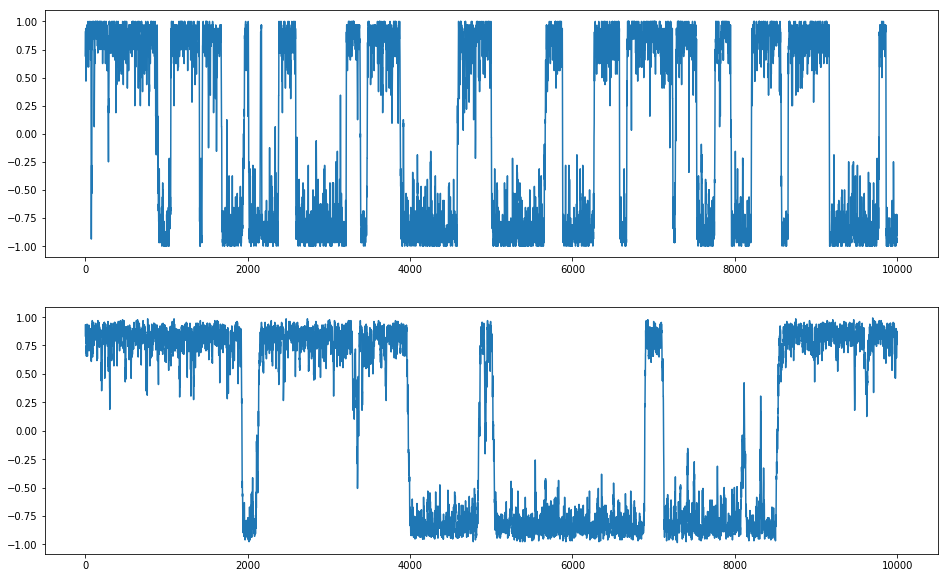

In [5]:
T = 2.2
N_MC = 10**4
fig, ax = plt.subplots(2, figsize=(16,10))

L = 8 
N = L * L
spins = np.ones( [L, L], int)
_, _, _, M = Monte_Carlo(T, L, N_MC, spins)
ax[0].plot(M/N)

L = 16
N = L * L
spins = np.ones( [L, L], int)
_, _, _, M = Monte_Carlo(T, L, N_MC, spins)
ax[1].plot(M/N)

fig.savefig('ReversalTime.png')

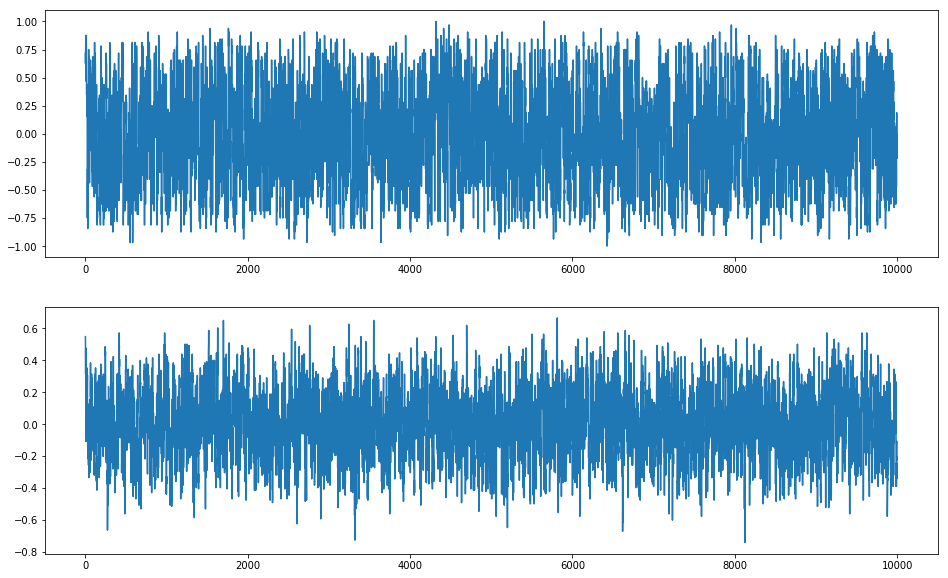

In [6]:
T = 3.0
N_MC = 10**4
fig, ax = plt.subplots(2, figsize=(16,10))

L = 8 
N = L * L
spins = np.ones( [L, L], int)
_, _, _, M = Monte_Carlo(T, L, N_MC, spins)
ax[0].plot(M/N)

L = 16
N = L * L
spins = np.ones( [L, L], int)
_, _, _, M = Monte_Carlo(T, L, N_MC, spins)
ax[1].plot(M/N)

fig.savefig('ReversalTimeT3.0.png')

## Magnetization distribution

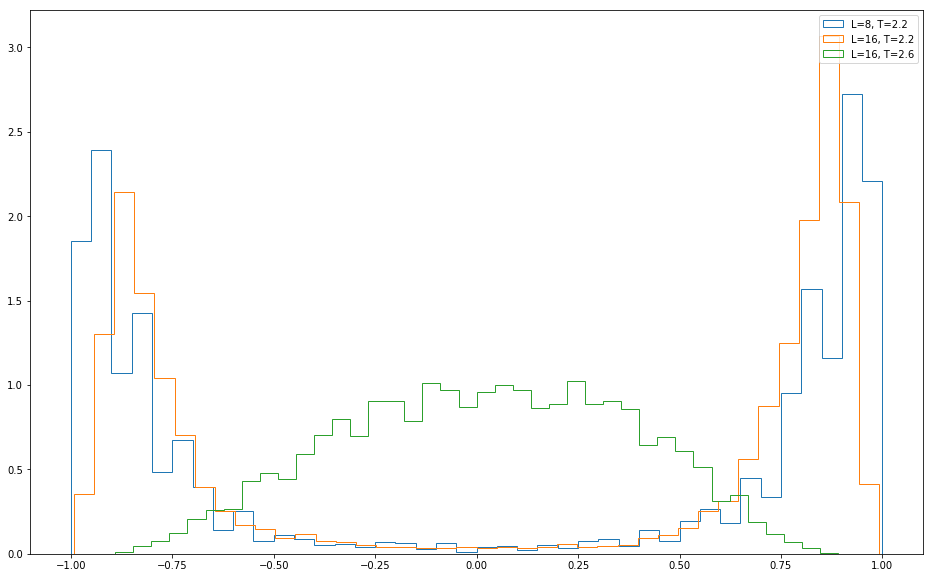

In [7]:
N_MC = 10**4
fig, ax = plt.subplots(figsize=(16,10))

L = 8
N = L * L

T = 2.2
spins = np.ones( [L, L], int)
spins = random_spins(L)
_, _, _, M = Monte_Carlo(T, L, N_MC, spins)
ax.hist(M/N, bins = 40, density = True, histtype = 'step', label = 'L=8, T=2.2')
ax.legend()

L = 16 
N = L * L

T = 2.2
spins = np.ones( [L, L], int)
spins = random_spins(L)
_, _, _, M = Monte_Carlo(T, L, N_MC, spins)
ax.hist(M/N, bins = 40, density = True, histtype = 'step', label = 'L=16, T=2.2')
ax.legend()

T = 2.6
spins = np.ones( [L, L], int)
spins = random_spins(L)
_, _, _, M = Monte_Carlo(T, L, N_MC, spins)
ax.hist(M/N, bins = 40, density = True, histtype = 'step', label = 'L=16, T=2.6')
ax.legend()

fig.savefig('MagnetizationDistribution.png')

## Autocorrelations and statistical errors

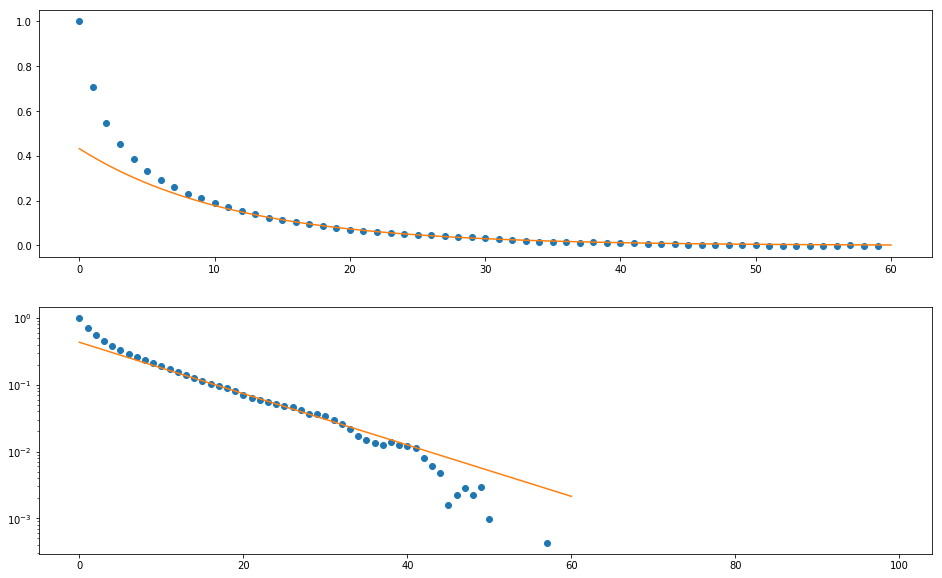

In [9]:
T = Tc
N_MC = 10**5

fig, ax = plt.subplots(2, 1, figsize=(16,10))

L = 16 
N = L * L
spins = np.ones( [L, L], int)
spins = random_spins(L)
_, _, E, M = Monte_Carlo(T, L, N_MC, spins)

E_sqr = E * E
E_mean = E.mean()
E_sqr_mean = E_sqr.mean()
var = E_sqr_mean - E_mean*E_mean

N_t = 100
A = np.empty(N_t)
A[0] = 1.0

for t in range(1, N_t):
    EE = E[:-t] * E[t:]
    A[t] = (EE.mean()-E_mean*E_mean)/var

t = np.linspace(0,60,100)
ax[0].plot(A[:60], 'o')
ax[0].plot(t, 0.432*np.exp(-t/11.3))

ax[1].plot(A, 'o')
ax[1].plot(t, 0.432*np.exp(-t/11.3))
ax[1].semilogy()
fig.savefig('Auto-CorrelationTc.png')

## Bins
We have $ \langle Q \rangle = \bar{Q} \pm \sigma_Q$, where

$$
  \bar{Q} = \frac{1}{N_B} \sum_{b=1}^{N_B} \bar{Q}_b, \;
  \sigma_Q^2 = \frac{1}{N_B(N_B-1)} \sum_{b=1}^{N_B} \left( \bar{Q}_b - \bar{Q} \right)^2.
$$

In [62]:
def MC_average_bin(T, E, M, binsize):
    N_MC = len(E)
    N_bin = N_MC//binsize
#     print(N_MC, binsize, N_bin)
    
    E_sqr = E * E
    E_mean = E.mean()
    E_sqr_mean = E_sqr.mean()
    C = (E_sqr_mean-E_mean*E_mean)/(kB*T*T)
#     print(E_mean, E_sqr_mean)
#     print(E.std(), E.std()/np.sqrt(N_MC), C)
        
    E_bin = np.empty(N_bin)
    E_sqr_bin = np.empty(N_bin)
    
    for b in range(N_bin):
        E_bin[b] = np.mean(E[b*binsize:(b+1)*binsize])
        E_sqr_bin[b] = np.mean(E_sqr[b*binsize:(b+1)*binsize])

    E_bin_mean = E_bin.mean()
    E_sqr_bin_mean = E_sqr_bin.mean()
#     if E_bin_mean != E_mean:
#         print('error!', E_bin_mean, E_mean)
#     if E_sqr_bin_mean != E_sqr_mean:
#         print('error!', E_sqr_bin_mean, E_sqr_mean)

    C_bin = (E_sqr_bin_mean-E_bin_mean*E_bin_mean)/(kB*T*T)
#     print(E_bin_mean, E_sqr_bin_mean)
#     print(E_bin.std(), E_bin.std()/np.sqrt(N_bin), C_bin)
                   
    M_abs = np.absolute(M)    
    M_sqr = M * M
    M_mean = M.mean()
    M_abs_mean = M_abs.mean()
    M_sqr_mean = M_sqr.mean()
    Chi = (M_sqr_mean-M_mean*M_mean)/(kB*T)
    Chi_abs = (M_sqr_mean-M_abs_mean*M_abs_mean)/(kB*T)    
    
    return E_bin_mean, C, M_abs_mean, Chi_abs, M_mean, Chi, M_sqr_mean, E_bin.std(), E_bin.std()/np.sqrt(N_bin)

In [76]:
10**4

10000

In [101]:
L = 2 
N = L * L
T =2.4
N_equilib = 100
N_MC = 10**6
spins = np.ones( [L, L], int)
# spins = random_spins(L)

print('{:<4} {:<16} {:<16} {:<16} {:<16} {:<16} {:<16} {:<16}'.format(
    'T', '<E>/N=<e>', 'C/N', '<|M|>/N=<|m|>', 'chi_|m|/N', 'acceptRatio', '<M>/N=<m>', 'chi/N')  )

_, _, _, _ = Monte_Carlo(T,L,N_equilib,spins)
acceptRatio, spins, E, M = Monte_Carlo(T,L,N_MC,spins)

E_mean, C, M_abs_mean, Chi_abs, M_mean, Chi, M_sqr_mean = MC_average(T, E, M)
print('{:<4} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f}'.format(
    T, E_mean/N, C/N, M_abs_mean/N, Chi_abs/N, acceptRatio, M_mean/N, Chi/N))

for binsize in [1]:
    E_mean, C, M_abs_mean, Chi_abs, M_mean, Chi, M_sqr_mean, std, error = MC_average_bin(T, E, M, binsize)
    print('{:<4} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f}'.format(
        T, E_mean/N, C/N, M_abs_mean/N, Chi_abs/N, acceptRatio, M_mean/N, Chi/N, std, error))

T    <E>/N=<e>        C/N              <|M|>/N=<|m|>    chi_|m|/N        acceptRatio      <M>/N=<m>        chi/N           
2.4  -1.746428        +0.313770        +0.905563        +0.116509        +0.126697        +0.000885        +1.483249       
2.4  -1.746428        +0.313770        +0.905563        +0.116509        +0.126697        +0.000885        +1.483249        +2.688730        +0.002689       


In [98]:
L = 2 
N = L * L
T = 2.5
N_equilib = 100
N_MC = 10**5
spins = np.ones( [L, L], int)
# spins = random_spins(L)

print('{:<4} {:<16} {:<16} {:<16} {:<16} {:<16} {:<16} {:<16}'.format(
    'T', '<E>/N=<e>', 'C/N', '<|M|>/N=<|m|>', 'chi_|m|/N', 'acceptRatio', '<M>/N=<m>', 'chi/N')  )

_, _, _, _ = Monte_Carlo(T,L,N_equilib,spins)
acceptRatio, spins, E, M = Monte_Carlo(T,L,N_MC,spins)

E_mean, C, M_abs_mean, Chi_abs, M_mean, Chi, M_sqr_mean = MC_average(T, E, M)
print('{:<4} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f}'.format(
    T, E_mean/N, C/N, M_abs_mean/N, Chi_abs/N, acceptRatio, M_mean/N, Chi/N))

for binsize in [1, 10, 100, 1000]:
    E_mean, C, M_abs_mean, Chi_abs, M_mean, Chi, M_sqr_mean, std, error = MC_average_bin(T, E, M, binsize)
    print('{:<4} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f}'.format(
        T, E_mean/N, C/N, M_abs_mean/N, Chi_abs/N, acceptRatio, M_mean/N, Chi/N, std, error))

T    <E>/N=<e>        C/N              <|M|>/N=<|m|>    chi_|m|/N        acceptRatio      <M>/N=<m>        chi/N           
2.5  -1.715820        +0.318824        +0.893195        +0.125464        +0.142680        -0.021895        +1.401173       
2.5  -1.715820        +0.318824        +0.893195        +0.125464        +0.142680        -0.021895        +1.401173        +2.823223        +0.008928       
2.5  -1.715820        +0.318824        +0.893195        +0.125464        +0.142680        -0.021895        +1.401173        +1.042625        +0.010426       
2.5  -1.715820        +0.318824        +0.893195        +0.125464        +0.142680        -0.021895        +1.401173        +0.327681        +0.010362       
2.5  -1.715820        +0.318824        +0.893195        +0.125464        +0.142680        -0.021895        +1.401173        +0.104822        +0.010482       


In [79]:
L = 2 
N = L * L
T = 2
N_equilib = 100
N_MC = 10**6
spins = np.ones( [L, L], int)
# spins = random_spins(L)

print('{:<4} {:<16} {:<16} {:<16} {:<16} {:<16} {:<16} {:<16}'.format(
    'T', '<E>/N=<e>', 'C/N', '<|M|>/N=<|m|>', 'chi_|m|/N', 'acceptRatio', '<M>/N=<m>', 'chi/N')  )

_, _, _, _ = Monte_Carlo(T,L,N_equilib,spins)
acceptRatio, spins, E, M = Monte_Carlo(T,L,N_MC,spins)

E_mean, C, M_abs_mean, Chi_abs, M_mean, Chi, M_sqr_mean = MC_average(T, E, M)
print('{:<4} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f}'.format(
    T, E_mean/N, C/N, M_abs_mean/N, Chi_abs/N, acceptRatio, M_mean/N, Chi/N))

for binsize in [1, 10, 100, 1000]:
    E_mean, C, M_abs_mean, Chi_abs, M_mean, Chi, M_sqr_mean, std, error = MC_average_bin(T, E, M, binsize)
    print('{:<4} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f}'.format(
        T, E_mean/N, C/N, M_abs_mean/N, Chi_abs/N, acceptRatio, M_mean/N, Chi/N, std, error))

T    <E>/N=<e>        C/N              <|M|>/N=<|m|>    chi_|m|/N        acceptRatio      <M>/N=<m>        chi/N           
2    -1.861534        +0.260183        +0.948249        +0.080968        +0.068999        -0.001474        +1.879314       
2    -1.861534        +0.260183        +0.948249        +0.080968        +0.068999        -0.001474        +1.879314        +2.040326        +0.002040       
2    -1.861534        +0.260183        +0.948249        +0.080968        +0.068999        -0.001474        +1.879314        +0.769552        +0.002434       
2    -1.861534        +0.260183        +0.948249        +0.080968        +0.068999        -0.001474        +1.879314        +0.247290        +0.002473       
2    -1.861534        +0.260183        +0.948249        +0.080968        +0.068999        -0.001474        +1.879314        +0.075399        +0.002384       


## Exact results for 2x2 lattice

In [39]:
L = 8 
N = L * L
T = 3
N_equilib = 100
N_MC = 10**3
spins = np.ones( [L, L], int)
# spins = random_spins(L)
    
acceptRatio, spins, E_list, M_list = Monte_Carlo(T,L,N_equilib,spins)
acceptRatio, spins, E_list, M_list = Monte_Carlo(T,L,N_MC,spins)
E, C, M_abs, chi_abs, M, chi, M_sqr = MC_average(T, E_list, M_list)

print('{:<4} {:<16} {:<16} {:<16} {:<16} {:<16} {:<16} {:<16}'.format(
    'T', '<E>/N=<e>', 'C', '<|M|>/N=<|m|>', 'chi_|m|/N', 'acceptRatio', '<M>/N=<m>', 'chi/N')  )
print('{:<4} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f}'.format(
    T, E/N, C, M_abs/N, chi_abs/N, acceptRatio, M/N, chi/N))

T    <E>/N=<e>        C                <|M|>/N=<|m|>    chi_|m|/N        acceptRatio      <M>/N=<m>        chi/N           
3    -0.826500        +33.453909       +0.338531        +1.097398        +0.453078        -0.001406        +3.542229       


In [73]:
print("MC:Sweeps in sequence")

T_0 = 1.0
dT = 1
N_sim = 8
N_equilib = 100
N_MC = 1000
L = 8
N = L * L

print("d=2 Ising model L = {}".format(L))
print("Number of equilitribum sweeps = {}".format(N_equilib))
print("Number of MC sweeps = {}".format(N_MC))

spins = np.ones( [L, L], int)
print('{:<4} {:<16} {:<16} {:<16} {:<16} {:<16} {:<16} {:<16}'.format(
    'T', '<E>/N=<e>', 'C', '<|M|>/N=<|m|>', 'chi_|m|/N', 'acceptRatio', '<M>/N=<m>', 'chi/N')  )
for n in range(N_sim):
    T = T_0 + n * dT
    
    acceptRatio, spins, E_list, M_list = Monte_Carlo(T,L,N_equilib,spins)
    acceptRatio, spins, E_list, M_list = Monte_Carlo(T,L,N_MC,spins)
    E, C, M_abs, chi_abs, M, chi, M_sqr = MC_average(T, E_list, M_list)    
    
    print('{:<4} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f}'.format(
        T, E/N, C, M_abs/N, chi_abs/N, acceptRatio, M/N, chi/N, M_sqr/N))

MC:Sweeps in sequence
d=2 Ising model L = 8
Number of equilitribum sweeps = 100
Number of MC sweeps = 1000
T    <E>/N=<e>        C                <|M|>/N=<|m|>    chi_|m|/N        acceptRatio      <M>/N=<m>        chi/N           
1.0  -1.997750        +1.131264        +0.999437        +0.001105        +0.000562        +0.999437        +0.001105        +63.929125      
2.0  -1.758500        +43.374016       +0.917687        +0.292501        +0.074656        +0.917687        +0.292501        +54.482625      
3.0  -0.852437        +31.371874       +0.355125        +1.114115        +0.438703        +0.003500        +3.804280        +11.413625      
4.0  -0.558312        +10.550511       +0.213469        +0.369319        +0.606437        -0.005594        +1.097921        +4.393688       
5.0  -0.433500        +5.813699        +0.169937        +0.197727        +0.693859        +0.004625        +0.567101        +2.836875       
6.0  -0.361125        +3.909652        +0.148531        +0.13668

In [8]:
N_equilib = 100
N_MC = 1000
L = 8
N = L * L

Ti = 0.5
Tf = 5
dt = 0.25

spins = np.ones( [L, L], int)
print('{:<16} {:<16} {:<16} {:<16} {:<16} {:<16} {:<16} {:<16}'.format(
    'T', '<E>/N=<e>', 'C', '<|M|>/N=<|m|>', 'chi_|m|/N', 'acceptRatio', '<M>/N=<m>', 'chi/N')  )

E = []
C = []
M_abs = []
M = []
M_sqr = []
chi_abs = []
chi = []

T_range = np.arange(Ti, Tf+dt, dt)
for T in T_range:
    acceptRatio, spins, E_list, M_list = Monte_Carlo(T,L,N_equilib,spins)
    acceptRatio, spins, E_list, M_list = Monte_Carlo(T,L,N_MC,spins)
    E_ave, C_ave, M_abs_ave, chi_abs_ave, M_ave, chi_ave, M_sqr_ave = MC_average(T, E_list, M_list)    
 
    E += [E_ave]
    C += [C_ave]
    M_abs += [M_abs_ave]
    M += [M_ave]
    M_sqr += [M_sqr_ave]
    chi_abs += [chi_abs_ave]
    chi += [chi_ave]
    
    print('{:<16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f}'.format(
        T, E_ave/N, C_ave, M_abs_ave/N, chi_abs_ave/N, acceptRatio, M_ave/N, chi_ave/N))    
E = np.array(E)
C = np.array(C)
M_abs = np.array(M_abs)
M = np.array(M)
M_sqr = np.array(M_sqr)
chi_abs = np.array(chi_abs)
chi = np.array(chi)    

T                <E>/N=<e>        C                <|M|>/N=<|m|>    chi_|m|/N        acceptRatio      <M>/N=<m>        chi/N           
0.500000         -2.000000        +0.000000        +1.000000        +0.000000        +0.000000        +1.000000        +0.000000       
0.750000         -1.999750        +0.227100        +0.999938        +0.000166        +0.000063        +0.999938        +0.000166       
1.000000         -1.997250        +1.377024        +0.999313        +0.001345        +0.000687        +0.999313        +0.001345       
1.250000         -1.982687        +5.982935        +0.995406        +0.008870        +0.004594        +0.995406        +0.008870       
1.500000         -1.952438        +11.149362       +0.987156        +0.021170        +0.012797        +0.987156        +0.021170       
1.750000         -1.885750        +24.055724       +0.965344        +0.080111        +0.033656        +0.965344        +0.080111       
2.000000         -1.751062        +44.650844    

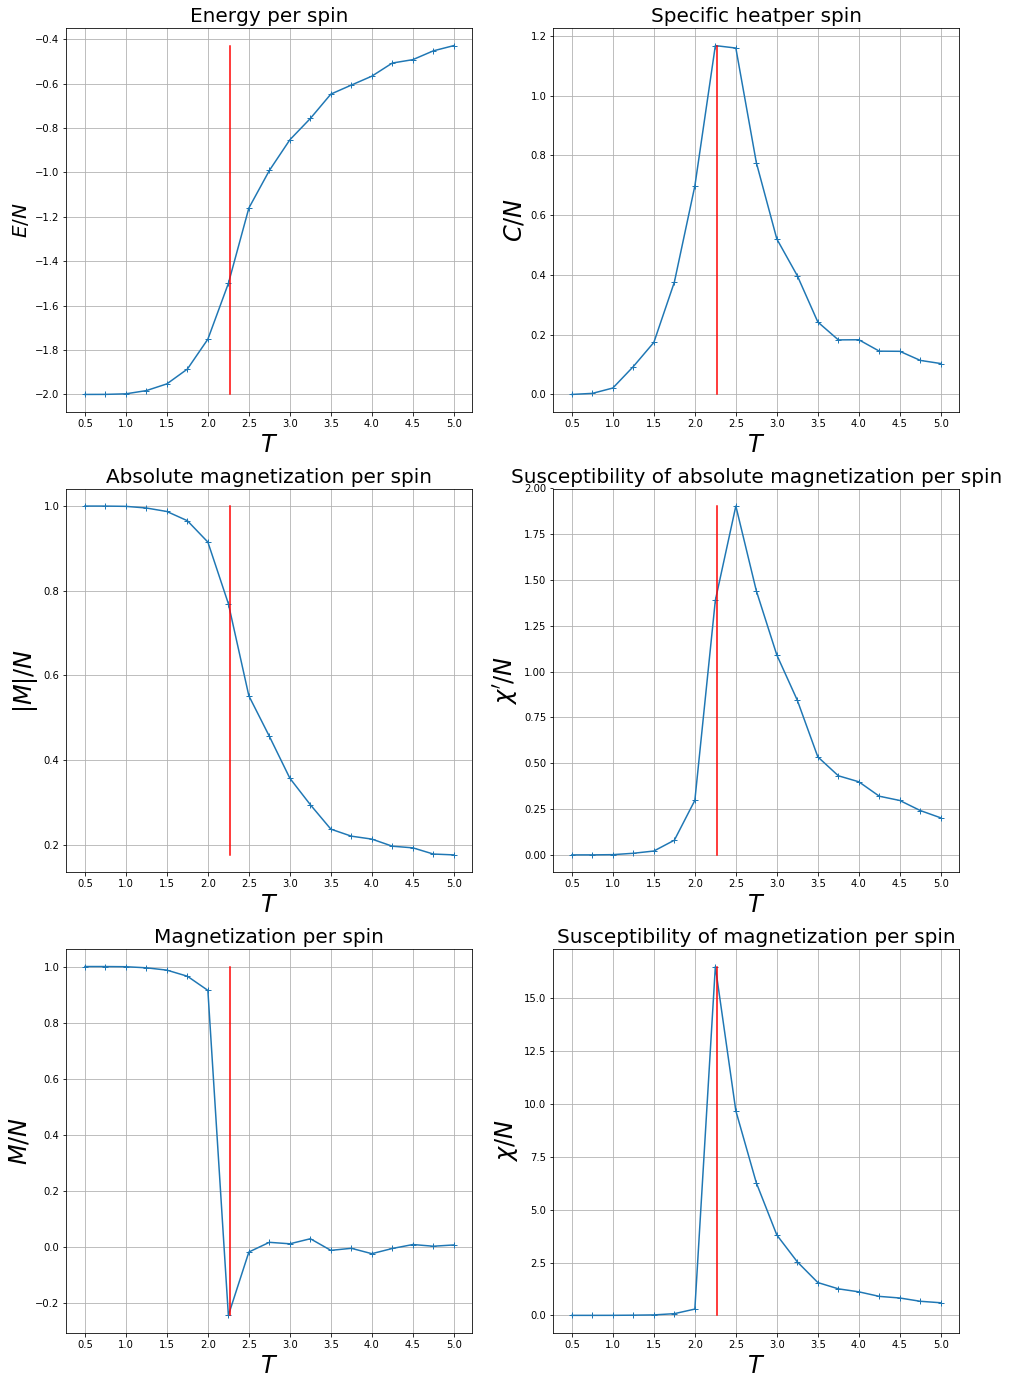

In [9]:
plt.figure(figsize=(16,24))

# energy per spin
plt.subplot(321)           
plt.title("Energy per spin", fontsize=20)

plt.plot(T_range, E/N, '-+')
plt.plot([Tc, Tc], [np.min(E/N),np.max(E/N)], 'r')
plt.xticks(np.arange(Ti, Tf+dt, 2*dt))
plt.xlabel(r'$T$', fontsize=24)
plt.ylabel(r'$E/N$', fontsize=20)
plt.grid(True)

# specific per spin
plt.subplot(322)           
plt.title("Specific heatper spin", fontsize=20)

plt.plot(T_range, C/N, '-+')
plt.plot([Tc, Tc], [np.min(C/N),np.max(C/N)], 'r')
plt.xticks(np.arange(Ti, Tf+dt, 2*dt))
plt.xlabel(r'$T$', fontsize=24)
plt.ylabel(r'$C/N$', fontsize=24)
plt.grid(True)

# absolute magnetizatipn per spin
plt.subplot(323)
plt.title("Absolute magnetization per spin", fontsize=20)

plt.plot(T_range, M_abs/N, '-+')
plt.plot([Tc, Tc], [np.min(M_abs/N),np.max(M_abs/N)], 'r')
plt.xticks(np.arange(Ti, Tf+dt, 2*dt))
plt.xlabel(r'$T$', fontsize=24)
plt.ylabel(r'$|M|/N$', fontsize=24)
plt.grid(True)

# (abs) susceptibility per spin
plt.subplot(324)
plt.title("Susceptibility of absolute magnetization per spin", fontsize=20)

plt.plot(T_range, chi_abs/N, '-+')
plt.plot([Tc, Tc], [np.min(chi_abs/N),np.max(chi_abs/N)], 'r')
plt.xticks(np.arange(Ti, Tf+dt, 2*dt))
plt.xlabel(r'$T$', fontsize=24)
plt.ylabel(r'$\chi^\prime/N$', fontsize=24)
plt.grid(True)

# susceptibility per spin
plt.subplot(325)
plt.title("Magnetization per spin", fontsize=20)

plt.plot(T_range, M/N, '-+')
plt.plot([Tc, Tc], [np.min(M/N),np.max(M/N)], 'r')
plt.xticks(np.arange(Ti, Tf+dt, 2*dt))
plt.xlabel(r'$T$', fontsize=24)
plt.ylabel(r'$M/N$', fontsize=24)
plt.grid(True)

# susceptibility per spin
plt.subplot(326)
plt.title("Susceptibility of magnetization per spin", fontsize=20)

plt.plot(T_range, chi/N, '-+')
plt.plot([Tc, Tc], [np.min(chi/N),np.max(chi/N)], 'r')
plt.xticks(np.arange(Ti, Tf+dt, 2*dt))
plt.xlabel(r'$T$', fontsize=24)
plt.ylabel(r'$\chi/N$', fontsize=24)
plt.grid(True)


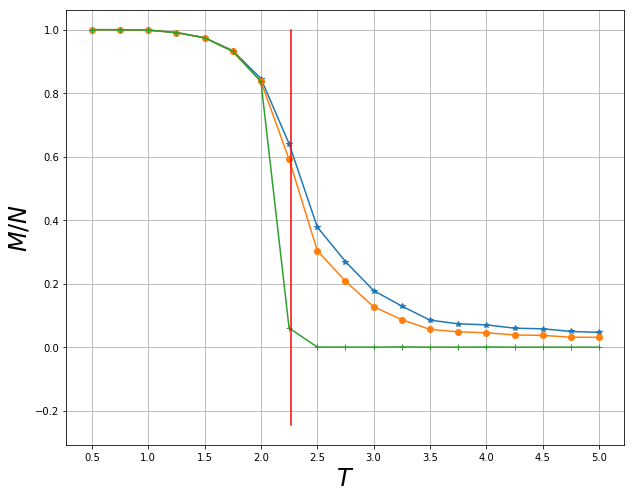

In [10]:
plt.figure(figsize=(10,8))
plt.plot(T_range, M_sqr/(N*N), '-*')
plt.plot(T_range, (M_abs/N)**2, '-o')
plt.plot(T_range, (M/N)**2, '-+')
plt.plot([Tc, Tc], [np.min(M/N),np.max(M/N)], 'r')
plt.xticks(np.arange(Ti, Tf+dt, 2*dt))
plt.xlabel(r'$T$', fontsize=24)
plt.ylabel(r'$M/N$', fontsize=24)
plt.grid(True)

In [11]:
N_equilib = 100
N_MC = 1000
L = 2
N = L * L

Ti = 0.5
Tf = 5
dt = 0.25

spins = np.ones( [L, L], int)
print('{:<16} {:<16} {:<16} {:<16} {:<16} {:<16} {:<16} {:<16}'.format(
    'T', '<E>/N=<e>', 'C', '<|M|>/N=<|m|>', 'chi_|m|/N', 'acceptRatio', '<M>/N=<m>', 'chi/N')  )

E = []
C = []
M_abs = []
M = []
M_sqr = []
chi_abs = []
chi = []

T_range = np.arange(Ti, Tf+dt, dt)
for T in T_range:
    acceptRatio, spins, E_list, M_list = Monte_Carlo(T,L,N_equilib,spins)
    acceptRatio, spins, E_list, M_list = Monte_Carlo(T,L,N_MC,spins)
    E_ave, C_ave, M_abs_ave, chi_abs_ave, M_ave, chi_ave, M_sqr_ave = MC_average(T, E_list, M_list)    
 
    E += [E_ave]
    C += [C_ave]
    M_abs += [M_abs_ave]
    M += [M_ave]
    M_sqr += [M_sqr_ave]
    chi_abs += [chi_abs_ave]
    chi += [chi_ave]
    
    print('{:<16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f}'.format(
        T, E_ave/N, C_ave, M_abs_ave/N, chi_abs_ave/N, acceptRatio, M_ave/N, chi_ave/N))    
E = np.array(E)
C = np.array(C)
M_abs = np.array(M_abs)
M = np.array(M)
M_sqr = np.array(M_sqr)
chi_abs = np.array(chi_abs)
chi = np.array(chi)    

T                <E>/N=<e>        C                <|M|>/N=<|m|>    chi_|m|/N        acceptRatio      <M>/N=<m>        chi/N           
0.500000         -2.000000        +0.000000        +1.000000        +0.000000        +0.000000        +1.000000        +0.000000       
0.750000         -2.000000        +0.000000        +1.000000        +0.000000        +0.000000        +1.000000        +0.000000       
1.000000         -1.996000        +0.127744        +0.999000        +0.001996        +0.001000        +0.132000        +3.924304       
1.250000         -1.978000        +0.445604        +0.992000        +0.020595        +0.009000        -0.173000        +3.073827       
1.500000         -1.962000        +0.530176        +0.987000        +0.026216        +0.017000        -0.547000        +1.826109       
1.750000         -1.902000        +0.973824        +0.963000        +0.067728        +0.045000        +0.147000        +2.138037       
2.000000         -1.872000        +0.958464     

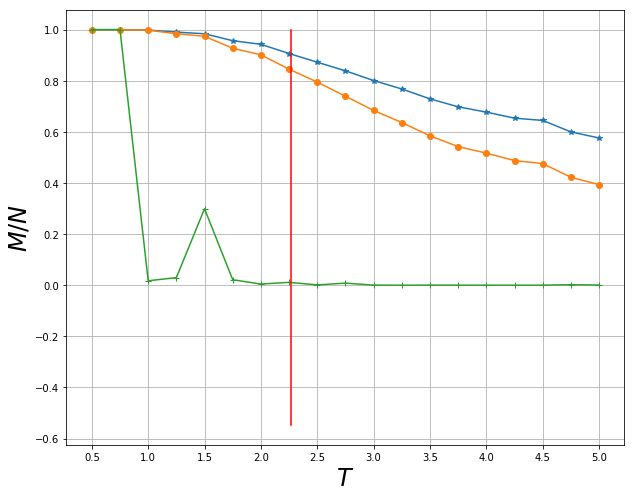

In [12]:
plt.figure(figsize=(10,8))
plt.plot(T_range, M_sqr/(N*N), '-*')
plt.plot(T_range, (M_abs/N)**2, '-o')
plt.plot(T_range, (M/N)**2, '-+')
plt.plot([Tc, Tc], [np.min(M/N),np.max(M/N)], 'r')
plt.xticks(np.arange(Ti, Tf+dt, 2*dt))
plt.xlabel(r'$T$', fontsize=24)
plt.ylabel(r'$M/N$', fontsize=24)
plt.grid(True)

In [14]:
N_equilib = 100
N_MC = 1000

Ti = 0.5
Tf = 5
dt = 0.25

E_size = {}
C_size = {}
M_abs_size = {}
M_size = {}
M_sqr_size = {}
chi_abs_size = {}
chi_size = {}

for L in [2,4,8,16,32]:
    print('size = {}'.format(L))
    N = L * L
    spins = np.ones( [L, L], int)
    print('{:<16} {:<16} {:<16} {:<16} {:<16} {:<16} {:<16} {:<16}'.format(
        'T', '<E>/N=<e>', 'C/N', '<|M|>/N=<|m|>', 'chi_|m|/N', 'acceptRatio', '<M>/N=<m>', 'chi/N')  )
    E = []
    C = []
    M_abs = []
    M = []
    M_sqr = []
    chi_abs = []
    chi = []

    T_range = np.arange(Ti, Tf+dt, dt)
    for T in T_range:
        acceptRatio, spins, E_list, M_list = Monte_Carlo(T,L,N_equilib,spins)
        acceptRatio, spins, E_list, M_list = Monte_Carlo(T,L,N_MC,spins)
        E_ave, C_ave, M_abs_ave, chi_abs_ave, M_ave, chi_ave, M_sqr_ave = MC_average(T, E_list, M_list)    

        E += [E_ave]
        C += [C_ave]
        M_abs += [M_abs_ave]
        M += [M_ave]
        M_sqr += [M_sqr_ave]
        chi_abs += [chi_abs_ave]
        chi += [chi_ave]

        print('{:<16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f}'.format(
            T, E_ave/N, C_ave/N, M_abs_ave/N, chi_abs_ave/N, acceptRatio, M_ave/N, chi_ave/N))    
        
    E_size[L] = np.array(E)
    C_size[L] = np.array(C)
    M_abs_size[L] = np.array(M_abs)
    M_size[L] = np.array(M)
    M_sqr_size[L] = np.array(M_sqr)
    chi_abs_size[L] = np.array(chi_abs)
    chi_size[L] = np.array(chi) 
        

size = 2
T                <E>/N=<e>        C/N              <|M|>/N=<|m|>    chi_|m|/N        acceptRatio      <M>/N=<m>        chi/N           
0.500000         -2.000000        +0.000000        +1.000000        +0.000000        +0.000000        +1.000000        +0.000000       
0.750000         -2.000000        +0.000000        +1.000000        +0.000000        +0.000000        +1.000000        +0.000000       
1.000000         -1.990000        +0.079600        +0.997000        +0.007964        +0.004000        +0.755000        +1.703900       
1.250000         -1.986000        +0.071178        +0.996000        +0.007949        +0.008000        +0.013000        +3.181859       
1.500000         -1.964000        +0.125696        +0.986000        +0.031477        +0.019000        +0.094000        +2.600437       
1.750000         -1.904000        +0.238738        +0.967000        +0.055797        +0.043000        -0.020000        +2.192229       
2.000000         -1.854000        +0.27

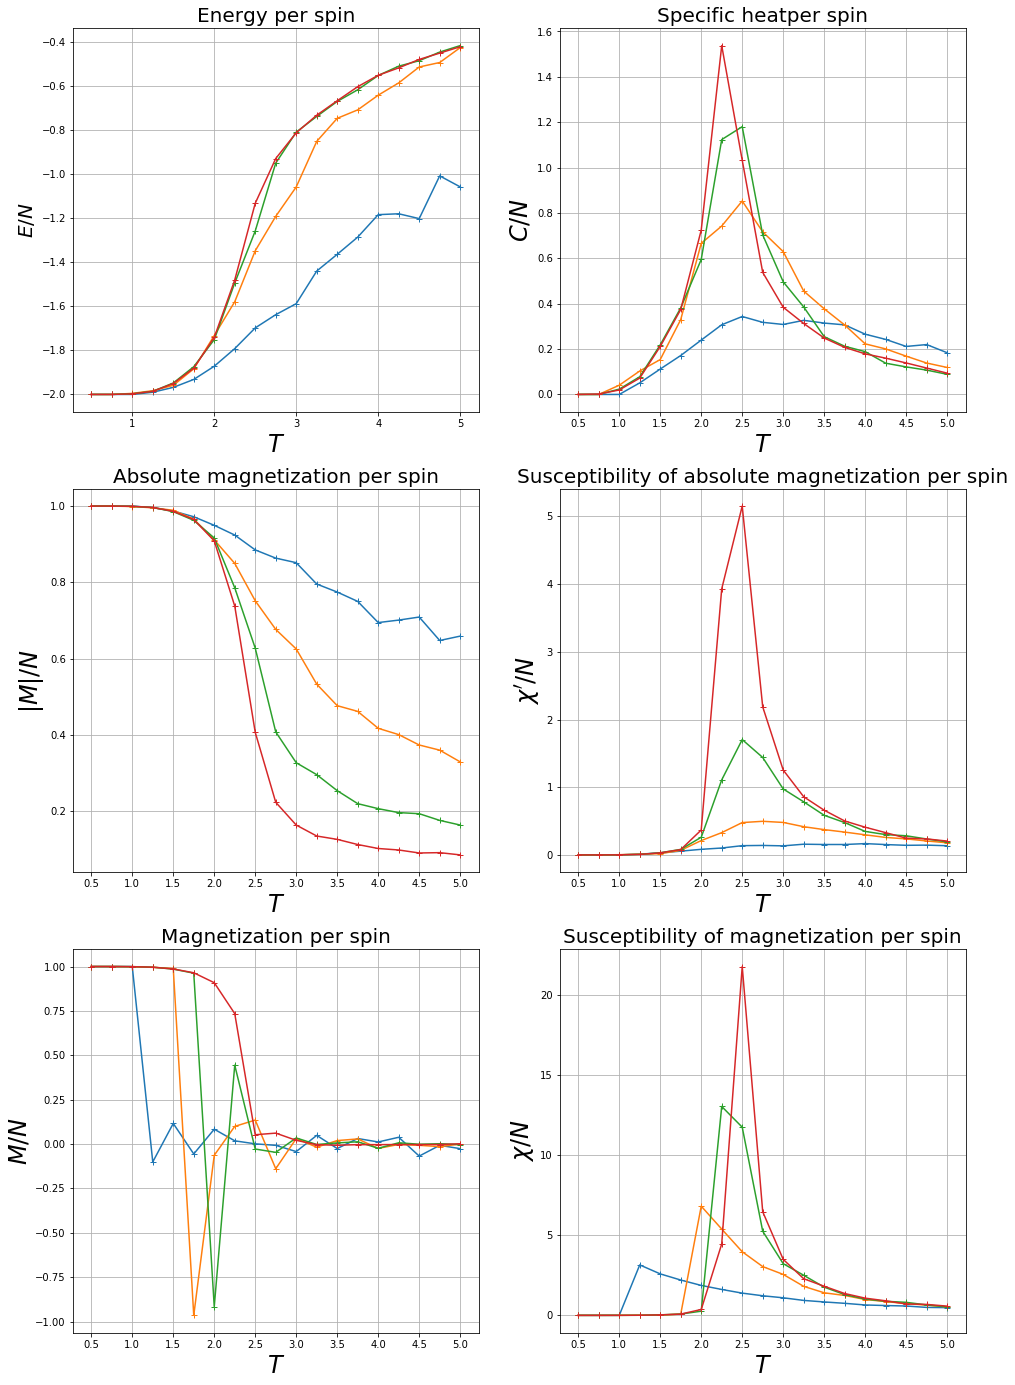

In [21]:
plt.figure(figsize=(16,24))

# energy per spin
plt.subplot(321)           
plt.title("Energy per spin", fontsize=20)
for L in [2,4,8,16]:
    plt.plot(T_range, E_size[L]/(L*L), '-+')
plt.xlabel(r'$T$', fontsize=24)
plt.ylabel(r'$E/N$', fontsize=20)
plt.grid(True)

# specific per spin
plt.subplot(322)           
plt.title("Specific heatper spin", fontsize=20)

for L in [2,4,8,16]:
    plt.plot(T_range, C_size[L]/(L*L), '-+')
plt.xticks(np.arange(Ti, Tf+dt, 2*dt))
plt.xlabel(r'$T$', fontsize=24)
plt.ylabel(r'$C/N$', fontsize=24)
plt.grid(True)

# absolute magnetizatipn per spin
plt.subplot(323)
plt.title("Absolute magnetization per spin", fontsize=20)

for L in [2,4,8,16]:
    plt.plot(T_range, M_abs_size[L]/(L*L), '-+')
plt.xticks(np.arange(Ti, Tf+dt, 2*dt))
plt.xlabel(r'$T$', fontsize=24)
plt.ylabel(r'$|M|/N$', fontsize=24)
plt.grid(True)

# (abs) susceptibility per spin
plt.subplot(324)
plt.title("Susceptibility of absolute magnetization per spin", fontsize=20)

for L in [2,4,8,16]:
    plt.plot(T_range, chi_abs_size[L]/(L*L), '-+')
plt.xticks(np.arange(Ti, Tf+dt, 2*dt))
plt.xlabel(r'$T$', fontsize=24)
plt.ylabel(r'$\chi^\prime/N$', fontsize=24)
plt.grid(True)

# susceptibility per spin
plt.subplot(325)
plt.title("Magnetization per spin", fontsize=20)

for L in [2,4,8,16]:
    plt.plot(T_range, M_size[L]/(L*L), '-+')
plt.xticks(np.arange(Ti, Tf+dt, 2*dt))
plt.xlabel(r'$T$', fontsize=24)
plt.ylabel(r'$M/N$', fontsize=24)
plt.grid(True)

# susceptibility per spin
plt.subplot(326)
plt.title("Susceptibility of magnetization per spin", fontsize=20)

for L in [2,4,8,16]:
    plt.plot(T_range, chi_size[L]/(L*L), '-+')
plt.xticks(np.arange(Ti, Tf+dt, 2*dt))
plt.xlabel(r'$T$', fontsize=24)
plt.ylabel(r'$\chi/N$', fontsize=24)
plt.grid(True)


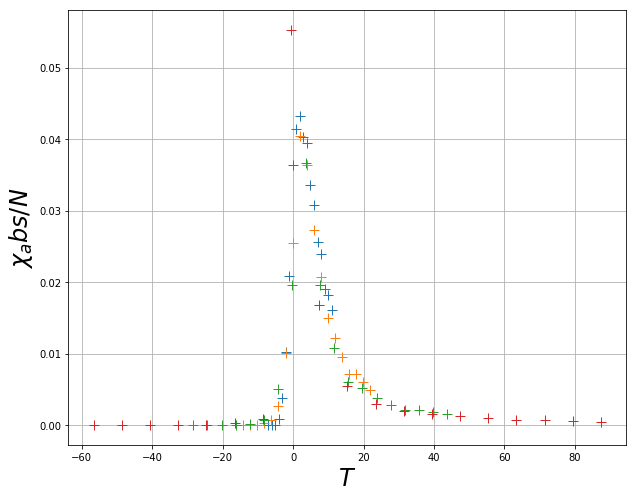

In [18]:
plt.figure(figsize=(10,8))
for L in [4,8,16,32]:
    plt.plot((T_range-Tc)*L, (chi_abs_size[L]*(L**(-7/4))/(L*L)), '+',markersize=10)
# plt.xticks(np.arange(Ti, Tf+dt, 2*dt))
plt.xlabel(r'$T$', fontsize=24)
plt.ylabel(r'$\chi_abs/N$', fontsize=24)
plt.grid(True)

## L=2

L = 2
T                <E>/N=<e>        C                <|M|>/N=<|m|>    chi_|m|/N        acceptRatio      <M>/N=<m>        chi/N           
2.250000         -1.780600        +1.249860        +0.918650        +0.108191        +0.108300        +0.028550        +1.607040       
2.270000         -1.785400        +1.212046        +0.920050        +0.106314        +0.108100        -0.019350        +1.597270       
2.290000         -1.776600        +1.230465        +0.914750        +0.113812        +0.113100        -0.022250        +1.574550       
2.310000         -1.779200        +1.213912        +0.918800        +0.105206        +0.112100        +0.001000        +1.567011       
2.330000         -1.767000        +1.227537        +0.913500        +0.110417        +0.114200        +0.003400        +1.542984       
2.350000         -1.752600        +1.267812        +0.907850        +0.115972        +0.120650        -0.011250        +1.518636       
2.370000         -1.757200        +1.23811

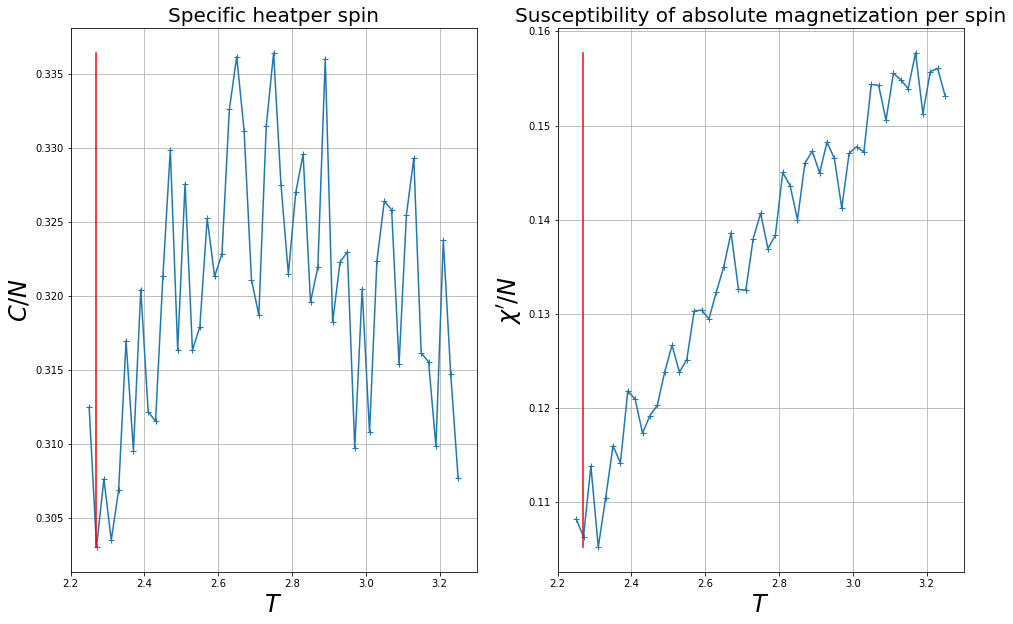

In [22]:
N_equilib = 100
N_MC = 1000
L = 2
N = L * L

# Ti = 0.5
# Tf = 5
# dt = 0.25
# N_MC = 1000

# C
Ti = 2.25
Tf = 3.25
dt = 0.02
N_MC = 10000


# Chi
# Ti = 3.00
# Tf = 4.00
# dt = 0.02
# N_MC = 100000



print("L = {}".format(L))
spins = np.ones( [L, L], int)
print('{:<16} {:<16} {:<16} {:<16} {:<16} {:<16} {:<16} {:<16}'.format(
    'T', '<E>/N=<e>', 'C', '<|M|>/N=<|m|>', 'chi_|m|/N', 'acceptRatio', '<M>/N=<m>', 'chi/N')  )

E = []
C = []
M_abs = []
M = []
M_sqr = []
chi_abs = []
chi = []

T_range = np.arange(Ti, Tf+dt, dt)
for T in T_range:
    acceptRatio, spins, E_list, M_list = Monte_Carlo(T,L,N_equilib,spins)
    acceptRatio, spins, E_list, M_list = Monte_Carlo(T,L,N_MC,spins)
    E_ave, C_ave, M_abs_ave, chi_abs_ave, M_ave, chi_ave, M_sqr_ave = MC_average(T, E_list, M_list)    
 
    E += [E_ave]
    C += [C_ave]
    M_abs += [M_abs_ave]
    M += [M_ave]
    M_sqr += [M_sqr_ave]
    chi_abs += [chi_abs_ave]
    chi += [chi_ave]
    
    print('{:<16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f}'.format(
        T, E_ave/N, C_ave, M_abs_ave/N, chi_abs_ave/N, acceptRatio, M_ave/N, chi_ave/N))    
E = np.array(E)
C = np.array(C)
M_abs = np.array(M_abs)
M = np.array(M)
M_sqr = np.array(M_sqr)
chi_abs = np.array(chi_abs)
chi = np.array(chi)    

# plot
plt.figure(figsize=(16,10))
plt.subplot(121)
plt.title("Specific heatper spin", fontsize=20)
plt.plot(T_range, C/N, '-+')
plt.plot([Tc, Tc], [np.min(C/N),np.max(C/N)], 'r')
# plt.xticks(np.arange(Ti, Tf+dt, 2*dt))
plt.xlabel(r'$T$', fontsize=24)
plt.ylabel(r'$C/N$', fontsize=24)
plt.grid(True)

plt.subplot(122)
plt.title("Susceptibility of absolute magnetization per spin", fontsize=20)
plt.plot(T_range, chi_abs/N, '-+')
plt.plot([Tc, Tc], [np.min(chi_abs/N),np.max(chi_abs/N)], 'r')
# plt.xticks(np.arange(Ti, Tf+dt, 2*dt))
plt.xlabel(r'$T$', fontsize=24)
plt.ylabel(r'$\chi^\prime/N$', fontsize=24)
plt.grid(True)


# max
i = 0
Tc_C = 0
C_max = 0
Tc_chi = 0
chi_max = 0

for T in T_range:
#     print(i, T)
    if C[i] > C_max:
        C_max = C[i]
        Tc_C = T
    if chi_abs[i] > chi_max:
        chi_max = chi_abs[i]
        Tc_chi = T
    i += 1

print()
print("{:<16} {:<16}".format("Tc_C", "C_max/N"))
print("{:<+16f} {:<+16f}".format(Tc_C, C_max/N))
print("{:<16} {:<16}".format("Tc_chi", "chi_max/N"))
print("{:<+16f} {:<+16f}".format(Tc_chi, chi_max/N))

In [66]:
#L=2
#Tc_C             C_max/N         
#+2.750000        +0.341597    
#Tc_chi           chi_max/N       
#+3.750000        +0.164222 

## L=4

L = 4
T                <E>/N=<e>        C                <|M|>/N=<|m|>    chi_|m|/N        acceptRatio      <M>/N=<m>        chi/N           
2.250000         -1.586125        +12.057978       +0.853975        +0.319034        +0.138450        +0.021725        +5.501622       
2.270000         -1.562675        +12.743269       +0.843612        +0.346349        +0.147613        -0.032837        +5.355010       
2.290000         -1.544675        +12.856403       +0.835225        +0.362767        +0.153881        +0.022425        +5.233320       
2.310000         -1.539150        +12.322037       +0.833638        +0.354633        +0.156294        +0.142088        +5.028313       
2.330000         -1.513400        +13.015166       +0.822850        +0.382591        +0.165631        -0.079675        +4.988489       
2.350000         -1.511075        +12.810828       +0.821750        +0.378524        +0.166137        -0.038500        +4.966036       
2.370000         -1.481000        +13.0367

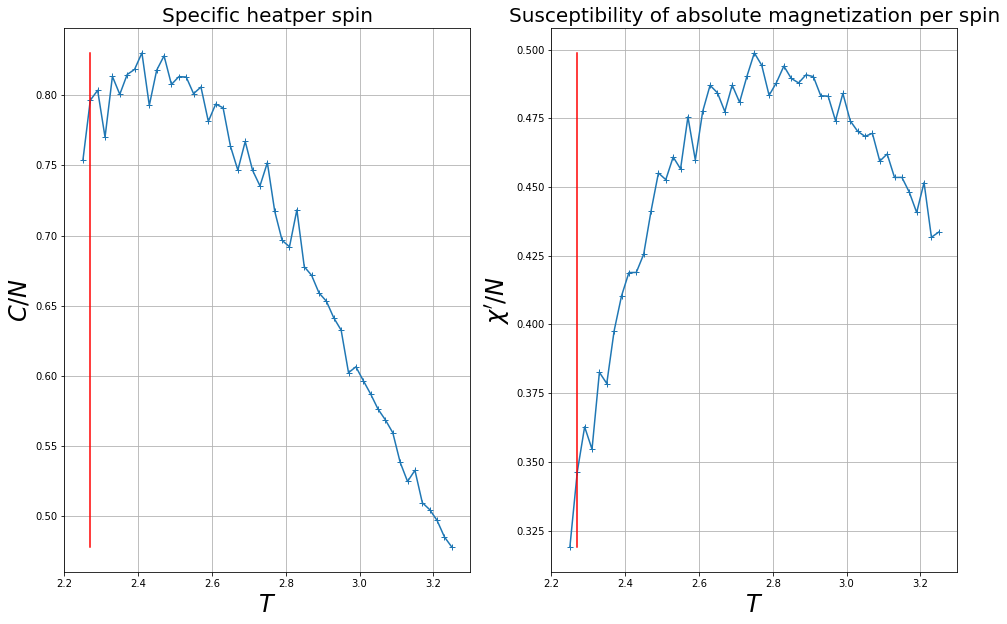

In [86]:
N_equilib = 100
N_MC = 1000
L = 4
N = L * L

Ti = 0.5
Tf = 5
dt = 0.25
N_MC = 1000

# C
# Ti = 2.00
# Tf = 3.00
# dt = 0.02
# N_MC = 10000


# Chi
Ti = 2.25
Tf = 3.25
dt = 0.02
N_MC = 10000



print("L = {}".format(L))
spins = np.ones( [L, L], int)
print('{:<16} {:<16} {:<16} {:<16} {:<16} {:<16} {:<16} {:<16}'.format(
    'T', '<E>/N=<e>', 'C', '<|M|>/N=<|m|>', 'chi_|m|/N', 'acceptRatio', '<M>/N=<m>', 'chi/N')  )

E = []
C = []
M_abs = []
M = []
M_sqr = []
chi_abs = []
chi = []

T_range = np.arange(Ti, Tf+dt, dt)
for T in T_range:
    acceptRatio, spins, E_list, M_list = Monte_Carlo(T,L,N_equilib,spins)
    acceptRatio, spins, E_list, M_list = Monte_Carlo(T,L,N_MC,spins)
    E_ave, C_ave, M_abs_ave, chi_abs_ave, M_ave, chi_ave, M_sqr_ave = MC_average(T, E_list, M_list)    
 
    E += [E_ave]
    C += [C_ave]
    M_abs += [M_abs_ave]
    M += [M_ave]
    M_sqr += [M_sqr_ave]
    chi_abs += [chi_abs_ave]
    chi += [chi_ave]
    
    print('{:<16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f}'.format(
        T, E_ave/N, C_ave, M_abs_ave/N, chi_abs_ave/N, acceptRatio, M_ave/N, chi_ave/N))    
E = np.array(E)
C = np.array(C)
M_abs = np.array(M_abs)
M = np.array(M)
M_sqr = np.array(M_sqr)
chi_abs = np.array(chi_abs)
chi = np.array(chi)    

# plot
plt.figure(figsize=(16,10))
plt.subplot(121)
plt.title("Specific heatper spin", fontsize=20)
plt.plot(T_range, C/N, '-+')
plt.plot([Tc, Tc], [np.min(C/N),np.max(C/N)], 'r')
# plt.xticks(np.arange(Ti, Tf+dt, 2*dt))
plt.xlabel(r'$T$', fontsize=24)
plt.ylabel(r'$C/N$', fontsize=24)
plt.grid(True)

plt.subplot(122)
plt.title("Susceptibility of absolute magnetization per spin", fontsize=20)
plt.plot(T_range, chi_abs/N, '-+')
plt.plot([Tc, Tc], [np.min(chi_abs/N),np.max(chi_abs/N)], 'r')
# plt.xticks(np.arange(Ti, Tf+dt, 2*dt))
plt.xlabel(r'$T$', fontsize=24)
plt.ylabel(r'$\chi^\prime/N$', fontsize=24)
plt.grid(True)


# max
i = 0
Tc_C = 0
C_max = 0
Tc_chi = 0
chi_max = 0

for T in T_range:
#     print(i, T)
    if C[i] > C_max:
        C_max = C[i]
        Tc_C = T
    if chi_abs[i] > chi_max:
        chi_max = chi_abs[i]
        Tc_chi = T
    i += 1

print()
print("{:<16} {:<16}".format("Tc_C", "C_max/N"))
print("{:<+16f} {:<+16f}".format(Tc_C, C_max/N))
print("{:<16} {:<16}".format("Tc_chi", "chi_max/N"))
print("{:<+16f} {:<+16f}".format(Tc_chi, chi_max/N))

In [ ]:
#Tc_C             C_max/N         
#+2.460000        +0.830062        
#Tc_chi           chi_max/N       
#+2.750000        +0.498761 

## L=8

L = 8
T                <E>/N=<e>        C                <|M|>/N=<|m|>    chi_|m|/N        acceptRatio      <M>/N=<m>        chi/N           
2.250000         -1.516730        +71.032438       +0.792421        +1.114847        +0.161981        +0.013704        +18.970666      
2.270000         -1.490646        +73.771094       +0.776922        +1.204572        +0.171550        +0.015380        +18.215901      
2.290000         -1.467082        +74.465117       +0.762493        +1.279829        +0.180859        +0.012409        +17.524154      
2.310000         -1.446954        +75.277772       +0.750195        +1.345501        +0.188676        +0.023041        +16.923314      
2.330000         -1.424157        +74.768579       +0.737035        +1.380600        +0.197376        -0.007525        +16.300138      
2.350000         -1.398853        +75.918692       +0.720471        +1.464144        +0.207318        -0.022070        +15.587480      
2.370000         -1.368929        +76.9318

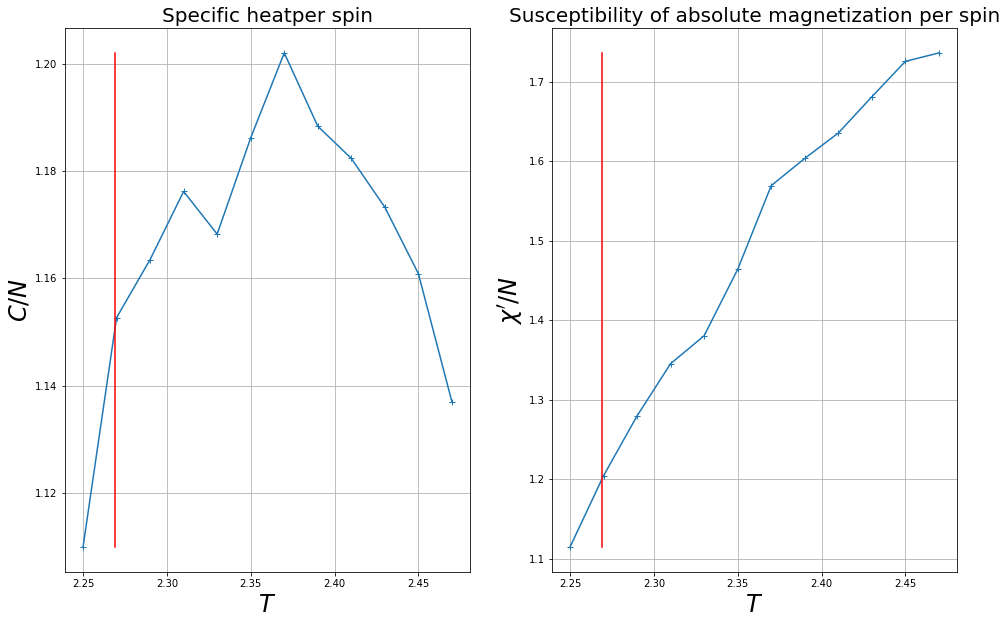

In [92]:
N_equilib = 100
N_MC = 1000
L = 8
N = L * L

Ti = 0.5
Tf = 5
dt = 0.25
N_MC = 1000

# C
Ti = 2.00
Tf = 3.00
dt = 0.02
N_MC = 10000

# C
Ti = 2.25
Tf = 2.45
dt = 0.02
N_MC = 100000

# Chi
# Ti = 2.25
# Tf = 3.25
# dt = 0.02
# N_MC = 10000



print("L = {}".format(L))
spins = np.ones( [L, L], int)
print('{:<16} {:<16} {:<16} {:<16} {:<16} {:<16} {:<16} {:<16}'.format(
    'T', '<E>/N=<e>', 'C', '<|M|>/N=<|m|>', 'chi_|m|/N', 'acceptRatio', '<M>/N=<m>', 'chi/N')  )

E = []
C = []
M_abs = []
M = []
M_sqr = []
chi_abs = []
chi = []

T_range = np.arange(Ti, Tf+dt, dt)
for T in T_range:
    acceptRatio, spins, E_list, M_list = Monte_Carlo(T,L,N_equilib,spins)
    acceptRatio, spins, E_list, M_list = Monte_Carlo(T,L,N_MC,spins)
    E_ave, C_ave, M_abs_ave, chi_abs_ave, M_ave, chi_ave, M_sqr_ave = MC_average(T, E_list, M_list)    
 
    E += [E_ave]
    C += [C_ave]
    M_abs += [M_abs_ave]
    M += [M_ave]
    M_sqr += [M_sqr_ave]
    chi_abs += [chi_abs_ave]
    chi += [chi_ave]
    
    print('{:<16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f}'.format(
        T, E_ave/N, C_ave, M_abs_ave/N, chi_abs_ave/N, acceptRatio, M_ave/N, chi_ave/N))    
E = np.array(E)
C = np.array(C)
M_abs = np.array(M_abs)
M = np.array(M)
M_sqr = np.array(M_sqr)
chi_abs = np.array(chi_abs)
chi = np.array(chi)    

# plot
plt.figure(figsize=(16,10))
plt.subplot(121)
plt.title("Specific heatper spin", fontsize=20)
plt.plot(T_range, C/N, '-+')
plt.plot([Tc, Tc], [np.min(C/N),np.max(C/N)], 'r')
# plt.xticks(np.arange(Ti, Tf+dt, 2*dt))
plt.xlabel(r'$T$', fontsize=24)
plt.ylabel(r'$C/N$', fontsize=24)
plt.grid(True)

plt.subplot(122)
plt.title("Susceptibility of absolute magnetization per spin", fontsize=20)
plt.plot(T_range, chi_abs/N, '-+')
plt.plot([Tc, Tc], [np.min(chi_abs/N),np.max(chi_abs/N)], 'r')
# plt.xticks(np.arange(Ti, Tf+dt, 2*dt))
plt.xlabel(r'$T$', fontsize=24)
plt.ylabel(r'$\chi^\prime/N$', fontsize=24)
plt.grid(True)


# max
i = 0
Tc_C = 0
C_max = 0
Tc_chi = 0
chi_max = 0

for T in T_range:
#     print(i, T)
    if C[i] > C_max:
        C_max = C[i]
        Tc_C = T
    if chi_abs[i] > chi_max:
        chi_max = chi_abs[i]
        Tc_chi = T
    i += 1

print()
print("{:<16} {:<16}".format("Tc_C", "C_max/N"))
print("{:<+16f} {:<+16f}".format(Tc_C, C_max/N))
print("{:<16} {:<16}".format("Tc_chi", "chi_max/N"))
print("{:<+16f} {:<+16f}".format(Tc_chi, chi_max/N))

In [ ]:
#Tc_C             C_max/N         
#+2.250000        +1.230209       
#Tc_chi           chi_max/N       
#+2.520000        +1.749723 

## L = 16

L = 16
T                <E>/N=<e>        C                <|M|>/N=<|m|>    chi_|m|/N        acceptRatio      <M>/N=<m>        chi/N           
2.000000         -1.743562        +185.841024      +0.911539        +0.453411        +0.079059        +0.911539        +0.453411       
2.020000         -1.731937        +165.504025      +0.908016        +0.289534        +0.083441        +0.908016        +0.289534       
2.040000         -1.724063        +184.346021      +0.903039        +0.340258        +0.086707        +0.903039        +0.340258       
2.060000         -1.703812        +218.139557      +0.891953        +0.534929        +0.093336        +0.891953        +0.534929       
2.080000         -1.690156        +221.224482      +0.886359        +0.559074        +0.098363        +0.886359        +0.559074       
2.100000         -1.653031        +291.031525      +0.860016        +1.427018        +0.112617        +0.860016        +1.427018       
2.120000         -1.630375        +279.91

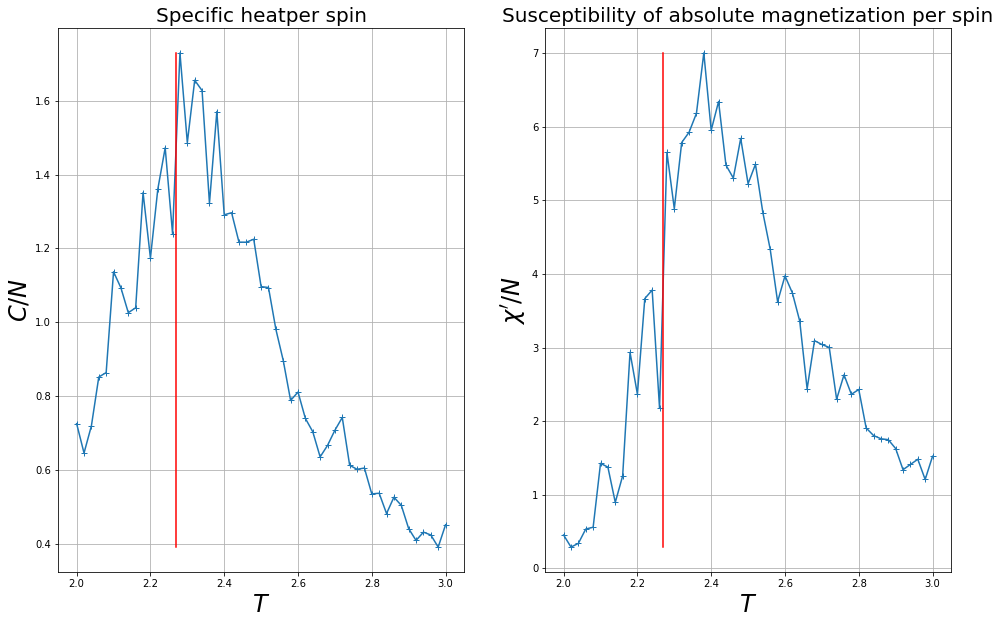

In [8]:
N_equilib = 100
N_MC = 1000
L = 16
N = L * L

Ti = 0.5
Tf = 5
dt = 0.25
N_MC = 1000

# C
Ti = 2.00
Tf = 3.00
dt = 0.02
N_MC = 1000

# C
# Ti = 2.25
# Tf = 2.45
# dt = 0.02
# N_MC = 1000

# Chi
# Ti = 2.25
# Tf = 3.25
# dt = 0.02
# N_MC = 10000



print("L = {}".format(L))
spins = np.ones( [L, L], int)
print('{:<16} {:<16} {:<16} {:<16} {:<16} {:<16} {:<16} {:<16}'.format(
    'T', '<E>/N=<e>', 'C', '<|M|>/N=<|m|>', 'chi_|m|/N', 'acceptRatio', '<M>/N=<m>', 'chi/N')  )

E = []
C = []
M_abs = []
M = []
M_sqr = []
chi_abs = []
chi = []

T_range = np.arange(Ti, Tf+dt, dt)
for T in T_range:
    acceptRatio, spins, E_list, M_list = Monte_Carlo(T,L,N_equilib,spins)
    acceptRatio, spins, E_list, M_list = Monte_Carlo(T,L,N_MC,spins)
    E_ave, C_ave, M_abs_ave, chi_abs_ave, M_ave, chi_ave, M_sqr_ave = MC_average(T, E_list, M_list)    
 
    E += [E_ave]
    C += [C_ave]
    M_abs += [M_abs_ave]
    M += [M_ave]
    M_sqr += [M_sqr_ave]
    chi_abs += [chi_abs_ave]
    chi += [chi_ave]
    
    print('{:<16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f}'.format(
        T, E_ave/N, C_ave, M_abs_ave/N, chi_abs_ave/N, acceptRatio, M_ave/N, chi_ave/N))    
E = np.array(E)
C = np.array(C)
M_abs = np.array(M_abs)
M = np.array(M)
M_sqr = np.array(M_sqr)
chi_abs = np.array(chi_abs)
chi = np.array(chi)    

# plot
plt.figure(figsize=(16,10))
plt.subplot(121)
plt.title("Specific heatper spin", fontsize=20)
plt.plot(T_range, C/N, '-+')
plt.plot([Tc, Tc], [np.min(C/N),np.max(C/N)], 'r')
# plt.xticks(np.arange(Ti, Tf+dt, 2*dt))
plt.xlabel(r'$T$', fontsize=24)
plt.ylabel(r'$C/N$', fontsize=24)
plt.grid(True)

plt.subplot(122)
plt.title("Susceptibility of absolute magnetization per spin", fontsize=20)
plt.plot(T_range, chi_abs/N, '-+')
plt.plot([Tc, Tc], [np.min(chi_abs/N),np.max(chi_abs/N)], 'r')
# plt.xticks(np.arange(Ti, Tf+dt, 2*dt))
plt.xlabel(r'$T$', fontsize=24)
plt.ylabel(r'$\chi^\prime/N$', fontsize=24)
plt.grid(True)


# max
i = 0
Tc_C = 0
C_max = 0
Tc_chi = 0
chi_max = 0

for T in T_range:
#     print(i, T)
    if C[i] > C_max:
        C_max = C[i]
        Tc_C = T
    if chi_abs[i] > chi_max:
        chi_max = chi_abs[i]
        Tc_chi = T
    i += 1

print()
print("{:<16} {:<16}".format("Tc_C", "C_max/N"))
print("{:<+16f} {:<+16f}".format(Tc_C, C_max/N))
print("{:<16} {:<16}".format("Tc_chi", "chi_max/N"))
print("{:<+16f} {:<+16f}".format(Tc_chi, chi_max/N))

In [105]:
#Tc_C             C_max/N 
#+2.280000        +1.729024    
#Tc_chi           chi_max/N       
#+2.500000        +4.99556

## L=32

In [119]:
N_equilib = 100
N_MC = 1000
L = 32
N = L * L

Ti = 0.5
Tf = 5
dt = 0.25
N_MC = 1000

# C
Ti = 2.00
Tf = 3.00
dt = 0.02
N_MC = 10000

# C
# Ti = 2.25
# Tf = 2.45
# dt = 0.02
# N_MC = 100000

# Chi
# Ti = 2.25
# Tf = 3.25
# dt = 0.02
# N_MC = 10000



print("L = {}".format(L))
spins = np.ones( [L, L], int)
print('{:<16} {:<16} {:<16} {:<16} {:<16} {:<16} {:<16} {:<16}'.format(
    'T', '<E>/N=<e>', 'C', '<|M|>/N=<|m|>', 'chi_|m|/N', 'acceptRatio', '<M>/N=<m>', 'chi/N')  )

E = []
C = []
M_abs = []
M = []
M_sqr = []
chi_abs = []
chi = []

T_range = np.arange(Ti, Tf+dt, dt)
for T in T_range:
    acceptRatio, spins, E_list, M_list = Monte_Carlo(T,L,N_equilib,spins)
    acceptRatio, spins, E_list, M_list = Monte_Carlo(T,L,N_MC,spins)
    E_ave, C_ave, M_abs_ave, chi_abs_ave, M_ave, chi_ave, M_sqr_ave = MC_average(T, E_list, M_list)    
 
    E += [E_ave]
    C += [C_ave]
    M_abs += [M_abs_ave]
    M += [M_ave]
    M_sqr += [M_sqr_ave]
    chi_abs += [chi_abs_ave]
    chi += [chi_ave]
    
    print('{:<16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f}'.format(
        T, E_ave/N, C_ave, M_abs_ave/N, chi_abs_ave/N, acceptRatio, M_ave/N, chi_ave/N))    
E = np.array(E)
C = np.array(C)
M_abs = np.array(M_abs)
M = np.array(M)
M_sqr = np.array(M_sqr)
chi_abs = np.array(chi_abs)
chi = np.array(chi)    

# plot
plt.figure(figsize=(16,10))
plt.subplot(121)
plt.title("Specific heatper spin", fontsize=20)
plt.plot(T_range, C/N, '-+')
plt.plot([Tc, Tc], [np.min(C/N),np.max(C/N)], 'r')
# plt.xticks(np.arange(Ti, Tf+dt, 2*dt))
plt.xlabel(r'$T$', fontsize=24)
plt.ylabel(r'$C/N$', fontsize=24)
plt.grid(True)

plt.subplot(122)
plt.title("Susceptibility of absolute magnetization per spin", fontsize=20)
plt.plot(T_range, chi_abs/N, '-+')
plt.plot([Tc, Tc], [np.min(chi_abs/N),np.max(chi_abs/N)], 'r')
# plt.xticks(np.arange(Ti, Tf+dt, 2*dt))
plt.xlabel(r'$T$', fontsize=24)
plt.ylabel(r'$\chi^\prime/N$', fontsize=24)
plt.grid(True)


# max
i = 0
Tc_C = 0
C_max = 0
Tc_chi = 0
chi_max = 0

for T in T_range:
#     print(i, T)
    if C[i] > C_max:
        C_max = C[i]
        Tc_C = T
    if chi_abs[i] > chi_max:
        chi_max = chi_abs[i]
        Tc_chi = T
    i += 1

print()
print("{:<16} {:<16}".format("Tc_C", "C_max/N"))
print("{:<+16f} {:<+16f}".format(Tc_C, C_max/N))
print("{:<16} {:<16}".format("Tc_chi", "chi_max/N"))
print("{:<+16f} {:<+16f}".format(Tc_chi, chi_max/N))

L = 32
T                <E>/N=<e>        C                <|M|>/N=<|m|>    chi_|m|/N        acceptRatio      <M>/N=<m>        chi/N           
2.000000         -1.746501        +726.982969      +0.911662        +0.383756        +0.078811        +0.911662        +0.383756       
2.020000         -1.730613        +787.095925      +0.904726        +0.431421        +0.084308        +0.904726        +0.431421       
2.040000         -1.714841        +805.008071      +0.896726        +0.520686        +0.089771        +0.896726        +0.520686       
2.060000         -1.697063        +896.414428      +0.887395        +0.688272        +0.095947        +0.887395        +0.688272       
2.080000         -1.682357        +897.571750      +0.881554        +0.615932        +0.101171        +0.881554        +0.615932       
2.100000         -1.664680        +983.894438      +0.870879        +0.892718        +0.107538        +0.870879        +0.892718       
2.120000         -1.643977        +1017.5

KeyboardInterrupt: 

In [120]:
#Tc_C             C_max/N         
#+2.250000        +1.241825       
#Tc_chi           chi_max/N       
#+2.500000        +10.124728 

In [9]:
L = np.array([2,4,8,16,32])
print(np.log(L))

C_max = np.array([+0.341597, +0.830062, +1.230209,+1.729024,2.04531676074])
print(np.log(C_max))

chi_abs_max = np.array([+0.164222, +0.498761, +1.749723,+4.99556,+19.816531    ])
print(np.log(chi_abs_max))

[0.69314718 1.38629436 2.07944154 2.77258872 3.4657359 ]
[-1.0741236  -0.18625488  0.20718407  0.54755709  0.71555267]
[-1.80653611 -0.69562826  0.55945749  1.60854952  2.98651649]


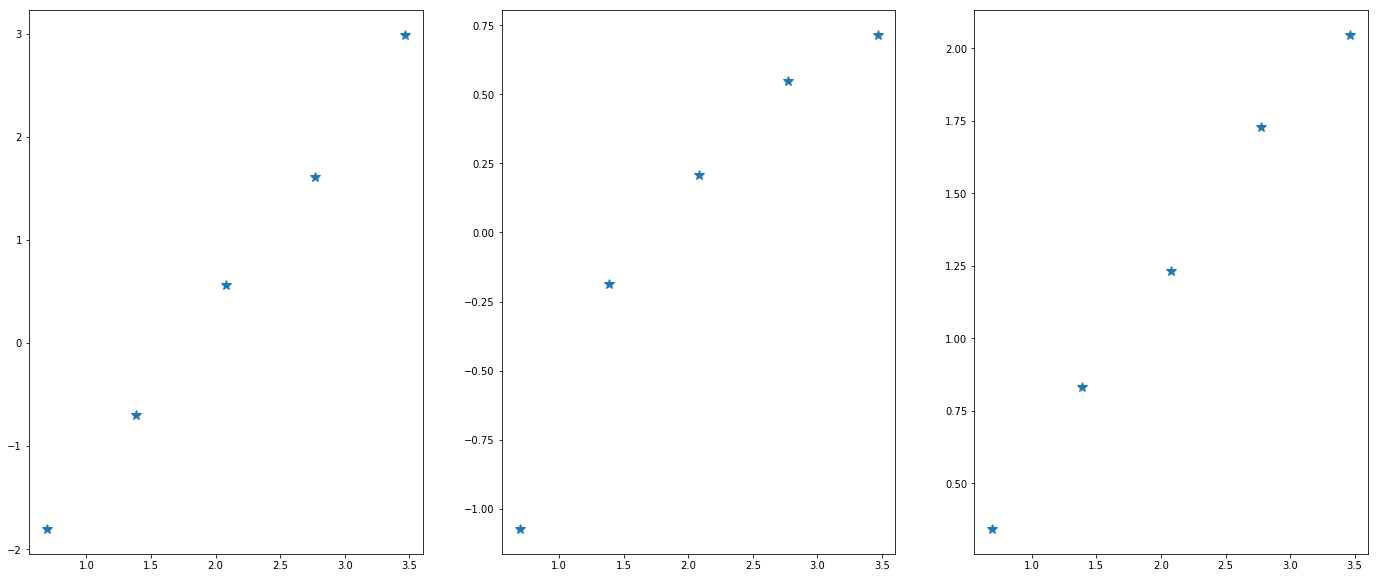

In [14]:
plt.figure(figsize=(24,10))
plt.subplot(131)
plt.plot(np.log(L), np.log(chi_abs_max),'*',markersize=10)

plt.subplot(132)
plt.plot(np.log(L), np.log(C_max),'*',markersize=10)

plt.subplot(133)
plt.plot(np.log(L), C_max,'*',markersize=10)